# Project 3: Regression Analysis of Gapminder Data
CMSC320, Spring 2024 

Justin Shim, Terrence Chungong, Benjamin Aharon

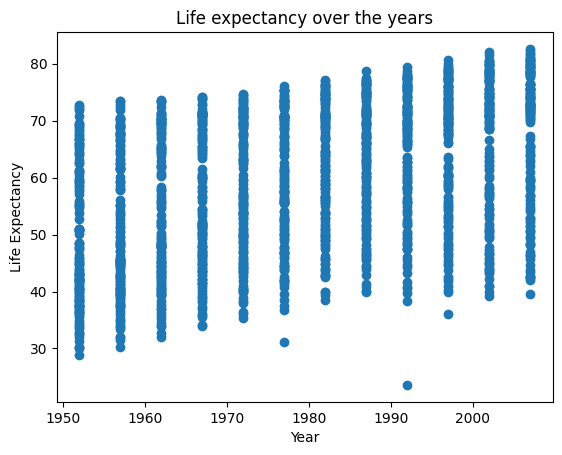

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm


file_path = 'data.tsv'

# Read the TSV file into a pandas DataFrame
df = pd.read_csv(file_path, delimiter='\t')

# Exercise 1
x = df['year']
y = df['lifeExp']

plt.scatter(x, y)
plt.title('Life expectancy over the years')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()

**Question 1**: *Is there a general trend (e.g., increasing or decreasing) for life expectancy across time? Is this trend linear?

There is a general trend where life expectancy is increasing over time linearly.

**Question 2**: How would you describe the distribution of life expectancy across countries for individual years? Is it skewed, or not? Unimodal or not? Symmetric around it’s center?

I would expect the distribution to be skewed in earlier years where some countries may have had relatively low life expectancies. I would expect the skewness to decrease over time. 
The distribution would be bimodal since some third world countries may have lower life expectancies related to other first world countries. The less developed countries would have mean life expectancies that cluster around lower values then less advanced countries.
The distribution would not be symmetric around it’s center for the same reason that it would not be unimodal.

**Question 3**: Suppose I fit a linear regression model of life expectancy vs. year (treating it as a continuous variable), and test for a relationship between year and life expectancy, will you reject the null hypothesis of no relationship?

I would reject the null hypothesis of there being no relationship since there seems to be a linear relationship between life expectancy and year.

**Question 4**: What would a violin plot of residuals (errors) from the linear model in Question 3 vs. year look like? (Again, don’t do the analysis yet, answer this intuitively). You would answer this question in the context of the variables in Question 3.

Since life expectancy seems to increase over time, a regression line would capture this relationship. On the violin plot of residuals, we would expect the residuals to be centered around 0 for most years, with more positive residuals appearing in the later years where the mean life expectancy may be underestimated.

**Question 5**: According to the assumptions of the linear regression model, what should that violin plot look like? You would answer this question as a general property of the residuals of the linear regression. We are looking to see if the Question 3 model fits the general assumptions.

The violin plot should show the values clustering around (peaking points near 0) for each point on the violin plot showing that the error has been minimized as best as possible. We would also expect box plot tails on the top of the box, representing the underestimation of the life expectancies.

# Justin's Contribution: E2 to E6


**Exercise 2**: Fit a linear regression model using, e.g., the `LinearRegression` function from Scikit-Learn or the closed-form solution we derived in class, for life expectancy vs. year (as a continuous variable). 

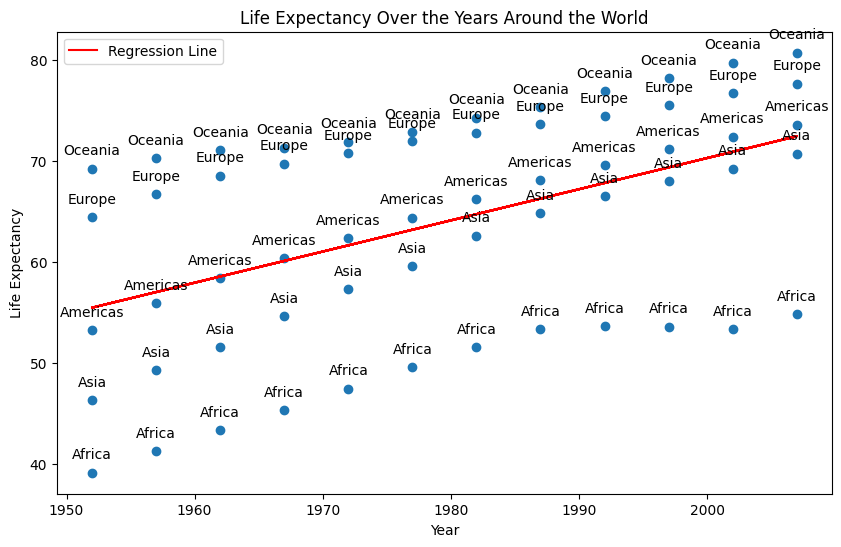

Slope (Year): 0.3085014252302476
Intercept: -546.7147983489472
                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     19.08
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           5.24e-05
Time:                        20:14:27   Log-Likelihood:                -218.83
No. Observations:                  60   AIC:                             441.7
Df Residuals:                      58   BIC:                             445.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [118]:
# Group by continent and calculate the mean of life expectancy
grouped_df = df.groupby(['continent', 'year'])['lifeExp'].mean().reset_index()

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(grouped_df['year'], grouped_df['lifeExp'])

# Fit a linear regression model
model = LinearRegression()
model.fit(grouped_df[['year']], grouped_df['lifeExp'])

# Plot the regression line
plt.plot(grouped_df['year'], model.predict(grouped_df[['year']]), color='red', label='Regression Line')

# Add labels for each point
for i in range(len(grouped_df)):
    plt.annotate(grouped_df['continent'].iloc[i], (grouped_df['year'].iloc[i], grouped_df['lifeExp'].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Life Expectancy Over the Years Around the World')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend()
plt.show()

# Display the slope and intercept
print(f'Slope (Year): {model.coef_[0]}')
print(f'Intercept: {model.intercept_}')

# To find the p-value and other statistics 
model = smf.ols(formula="lifeExp ~ year", data=grouped_df).fit()

# Get the summary of the model
summary = model.summary()

# Print the summary to see the statistics
print(summary)

**Question 6**: On average, by how much does life expectancy increase every year around the world? To find the p-value and other statistics, you may use statsmodels.formula.api library. In that library there is a function

On average, life expectancy increases by .308501 per year.

**Question 7**: Do you reject the null hypothesis of no relationship between year and life expectancy? Why?

The p-value associated with the coefficient for the 'year' variable is less than 0.05. This suggests that there is a statistically significant relationship between the year and life expectancy. In this case, we would reject the null hypothesis of no relationship between year and life expectancy, and conclude that there is evidence to support a linear relationship between the two variables.

**Exercise 3**: Make a violin plot of residuals vs. year for the linear model from Exercise 2.

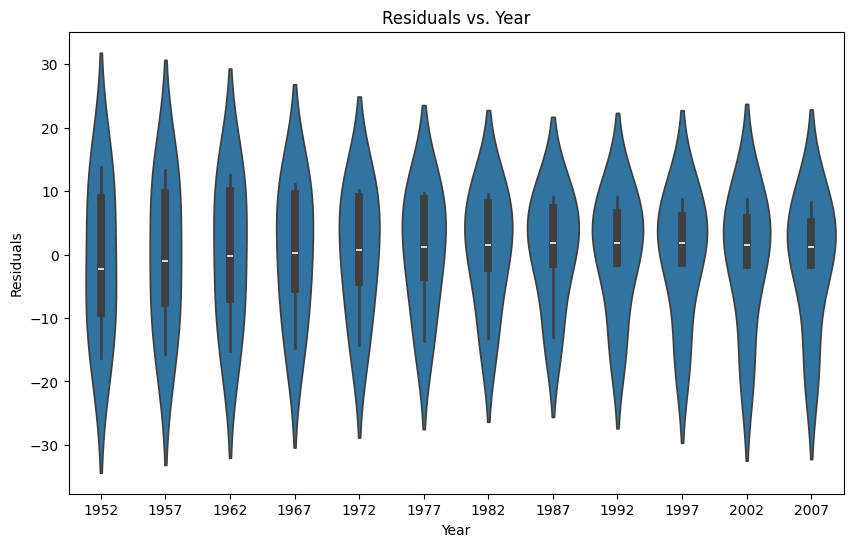

In [119]:
# Calculate residuals
residuals = grouped_df['lifeExp'] - model.predict(grouped_df[['year']])

# Add residuals to grouped_df
grouped_df['residuals'] = residuals

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='year', y='residuals', data=grouped_df)
plt.title('Residuals vs. Year')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.show()

**Question 8**:  Does the plot of Exercise 3 match your expectations (as you answered Question 4)?

Yes, this does match the expectations. The residuals are roughly centered around 0 for all of the years. 

**Exercise 4**:  Make a boxplot (or violin plot) of model residuals vs. continent.

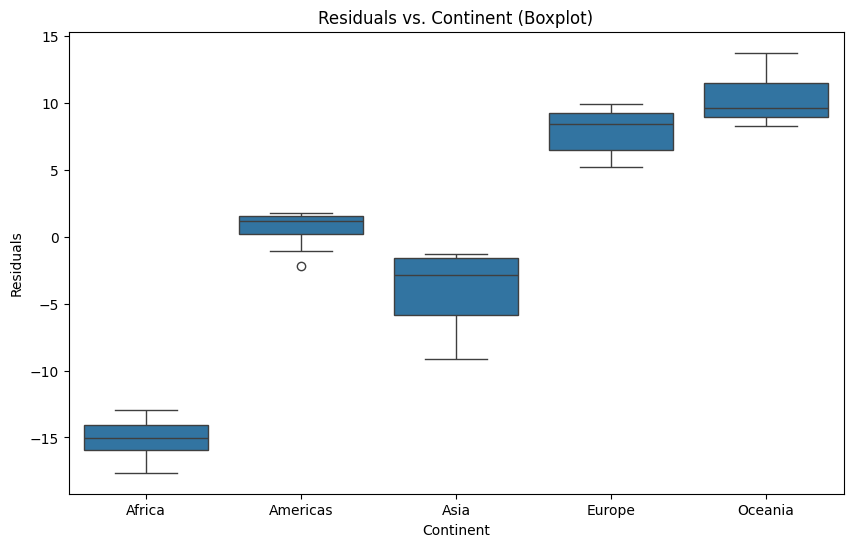

In [120]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='continent', y='residuals', data=grouped_df)
plt.title('Residuals vs. Continent (Boxplot)')
plt.xlabel('Continent')
plt.ylabel('Residuals')
plt.show()

**Question 9**:  Is there a dependence between model residual and continent? If so, what would that suggest when performing a regression analysis of life expectancy across time?

There is a strong dependence between the model residuals (the differences b/w the observed and predicted values) and 'continent.' This suggests that the linear regression model may not adequately capture the relationship between lifeExp and year for different continents.

**Exercise 5**:  As in the Moneyball project, make a scatter plot of life expectancy vs. year, grouped by continent, and add a regression line.

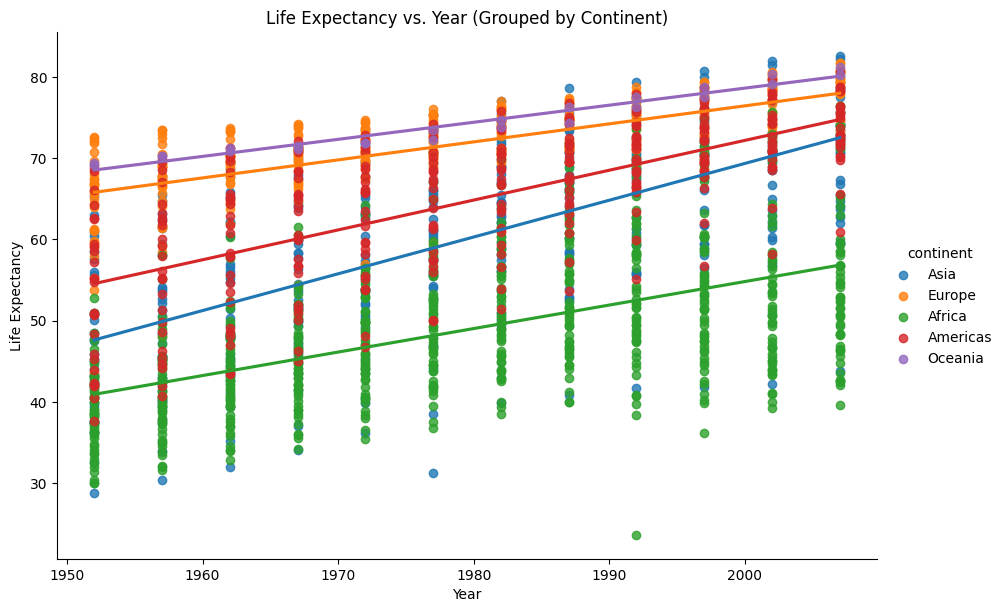

In [121]:
# Create a scatter plot with regression lines
sns.lmplot(x='year', y='lifeExp', data=df, hue='continent', height=6, aspect=1.5, ci=None)
plt.title('Life Expectancy vs. Year (Grouped by Continent)')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()

**Question 10**:  Based on this plot, should your regression model include an interaction term for continent and year? Why?

Yes, because each continent experienced a positive correlation between lifeExp and Year. It is possible that continent has a statistically significant effect on the relationship. 

**Exercise 6**:  Fit a linear regression model for life expectancy including a term for an interaction between continent and year. You may import statsmodel.formula.api to run ordinary least squares for this. 

In [122]:
# Fit the linear regression model with interaction term
model = smf.ols(formula="lifeExp ~ year + continent + year:continent", data=df).fit()

# Get the summary of the model
summary = model.summary()

# Print the summary to see the statistics
print(summary)

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:14:28   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

Benjamin's contribution: Question 11 - Exercise 8

**Question 11**:  Are all parameters in the model significantly different from zero? If not, which are not significantly different from zero?

In [123]:
# Fit the linear regression model with interaction term
model = smf.ols(formula="lifeExp ~ year + continent + year:continent", data=df).fit()

# Get the summary of the model
summary = model.summary()

summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:14:28   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   -524.2578     32.963    -15.904      0.000    -588.911    -459.605
continent[T.Americas]       -138.8484     57.851     -2.400      0.016    -252.315     -25.382
continent[T.Asia]           -312.6330     52.904     -5.909      0.000    -416.396    -208.870
continent[T.Europe]          156.8469     54.498      2.878      0.004      49.957     263.737
continent[T.Oceania]         182.3499    171.283      1.065      0.287    -153.599     518.298
year                           0.2895      0.017     17.387      0.000       0.257       0.322
year:continent[T.Americas]     0.0781      0.029      2.673      0.008       0.021       0.135
year:continent[T.Asia]         0.1636      0.027      6.121      0.000       0.111       0.216
year:continent[T.Europe]      -0.0676      0.028     -2.455      0.014      -0.122      -0.014
year:continent[T.Oceania]     -0.0793      0.087     -0.916      0.360      -0.249       0.090
==============================================================================
Omnibus:                       27.121   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.106
Skew:                          -0.121   Prob(JB):                     2.65e-10
Kurtosis:                       3.750   Cond. No.                     2.09e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [124]:
#Get p-values for every coeffienct
p_vals = [float(item[4]) for item in summary.tables[1].data[1:]]
p_vals

[0.0, 0.016, 0.0, 0.004, 0.287, 0.0, 0.008, 0.0, 0.014, 0.36]

Every p-value is less 0.05, therfore all coefficients in the model are significantly different from zero.

**Question 12**:  On average, by how much does life expectancy increase each year for each continent? (Provide code to answer this question by extracting relevant estimates from model fit).


In [125]:
# Extract the coefficients from the model
coeffs = model.params

# Filter coefficients for ones relating to continents and years
interaction_coeffs = coeffs[coeffs.index.str.startswith('year:continent')]

interaction_coeffs


year:continent[T.Americas]    0.078122
year:continent[T.Asia]        0.163593
year:continent[T.Europe]     -0.067597
year:continent[T.Oceania]    -0.079257
dtype: float64

In the Americas: Life expectancy increases about 0.078122 years per year.
In Asia: Life expectancy increases about 0.163593 years per year.
In Europe: Life expectancy decreases about 0.067597 years per year.
In Oceania: Life expectancy decreases about approximately 0.079257 years per year.

**Exercise 7**:  Perform an F-test that compares how well two models fit your data: (a) the linear regression models from Exercise 2 (only including year as a covariate) and (b) Exercise 6 (including interaction between year and continent).
The F-test is obtained by calling fvalue from the results of exercises 2 and 6.

In [126]:
# Fit the linear regression model from Exercise 2
model_year_only = smf.ols(formula="lifeExp ~ year", data=df).fit()

# Fit the linear regression model from Exercise 6
model_interaction = smf.ols(formula="lifeExp ~ year + continent + year:continent", data=df).fit()

# Perform the F-test
anova_results = anova_lm(model_year_only, model_interaction)

# Extract F-statistic and p-value from ANOVA table
F_statistic = anova_results['F'][1]
p_value = anova_results['Pr(>F)'][1]

print("F-statistic:", F_statistic)
print("p-value:", p_value)


F-statistic: 346.55352766258636
p-value: 0.0


**Question 13**:  Is the interaction model significantly better than the year-only model? Why?

Yes, the interaction model is significantly better than the year-only model because its F-statistic is big and its p-value is small.


**Exercise 8**:  Make a residuals vs. year violin plot for the interaction model. Comment on how well it matches assumptions of the linear regression model. Do the same for a residuals vs. fitted values model.



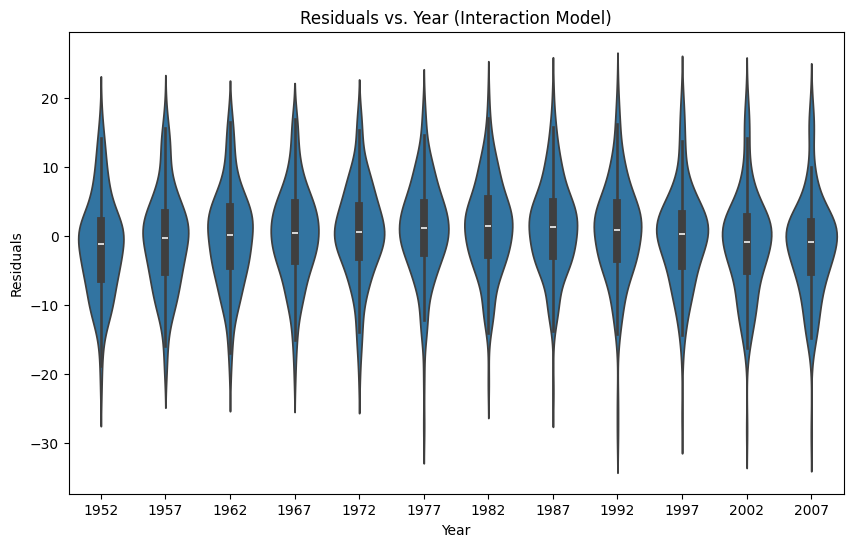

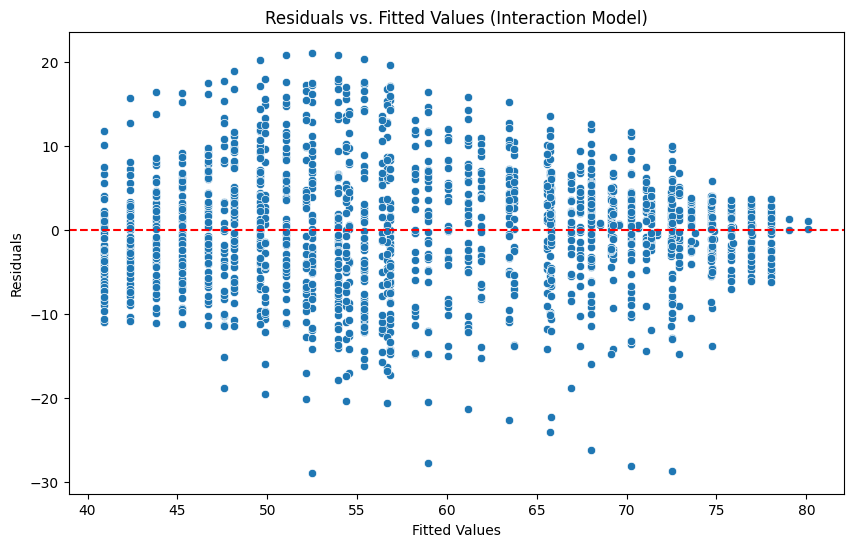

In [128]:
# Calculate residuals from the interaction model
residuals_interaction = model_interaction.resid

# Combine residuals with year
residuals_df = pd.DataFrame({'Year': df['year'], 'Residuals': residuals_interaction})

# Create violin plot of residuals vs. year
plt.figure(figsize=(10, 6))
sns.violinplot(x='Year', y='Residuals', data=residuals_df)
plt.title('Residuals vs. Year (Interaction Model)')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.show()

# Create residuals vs. fitted values plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model_interaction.fittedvalues, y=residuals_interaction)
plt.title('Residuals vs. Fitted Values (Interaction Model)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()